In [373]:
from enum import unique

import pandas as pd

df = pd.read_csv("./marketing_campaign.csv")

In [374]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
1778,10477.0,1973.0,PhD,Together,39435.0,NaN,0.0,6/8/2013,NaN,71.0,0.0,NaN,1.0,3.0,NaN,2.0,7.0,0.0,0.0,0.0
978,3308.0,1952.0,Graduation,NaN,NaN,1.0,1.0,3/1/2014,54.0,30.0,9.0,30.0,3.0,2.0,0.0,4.0,4.0,0.0,0.0,0.0
1785,9648.0,NaN,Graduation,Single,46904.0,1.0,1.0,3/11/2012,20.0,153.0,NaN,31.0,4.0,5.0,NaN,4.0,NaN,0.0,0.0,0.0
2028,9323.0,1949.0,Master,Together,49912.0,0.0,1.0,7/9/2012,5.0,520.0,8.0,42.0,4.0,10.0,5.0,7.0,8.0,0.0,0.0,NaN
1551,7725.0,1965.0,NaN,NaN,NaN,NaN,0.0,8/3/2014,33.0,173.0,26.0,81.0,1.0,NaN,4.0,7.0,1.0,NaN,0.0,0.0


In [375]:
df.isnull().sum()

ID                     308
Year_Birth             315
Education              319
Marital_Status         316
Income                 385
Kidhome                319
Teenhome               290
Dt_Customer            311
Recency                310
MntWines               333
MntFruits              310
MntGoldProds           319
NumDealsPurchases      304
NumWebPurchases        333
NumCatalogPurchases    340
NumStorePurchases      325
NumWebVisitsMonth      313
AcceptedCmp1           296
AcceptedCmp2           318
Response               340
dtype: int64

In [376]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=["object","category"]):
    mask = df[column].isnull()
    df[column] = label_encoder.fit_transform(df[column])
    df.loc[mask,column] = None
    

In [377]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
1906,17.0,1971.0,5.0,3.0,60491.0,0.0,1.0,579.0,81.0,637.0,47.0,76.0,4.0,6.0,11.0,7.0,5.0,0.0,0.0,0.0
570,6818.0,1974.0,NaN,3.0,44989.0,0.0,1.0,85.0,26.0,98.0,NaN,106.0,5.0,5.0,1.0,NaN,6.0,0.0,NaN,0.0
1165,NaN,1972.0,2.0,3.0,NaN,0.0,1.0,323.0,NaN,441.0,35.0,11.0,NaN,4.0,2.0,12.0,4.0,0.0,0.0,NaN
2202,11133.0,1973.0,NaN,NaN,NaN,0.0,1.0,202.0,3.0,322.0,3.0,42.0,5.0,NaN,1.0,6.0,8.0,0.0,0.0,1.0
969,3933.0,1980.0,2.0,NaN,44010.0,1.0,NaN,100.0,46.0,186.0,36.0,48.0,6.0,10.0,2.0,6.0,9.0,0.0,0.0,0.0


In [378]:
df.Response.unique()

array([ 1.,  0., nan])

In [379]:
df.drop(columns=["ID"],axis=1,inplace=True)

In [380]:
df.corr()>0.4

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
Year_Birth,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Education,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Marital_Status,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Income,False,False,False,True,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False
Kidhome,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
Teenhome,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Dt_Customer,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
Recency,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
MntWines,False,False,False,True,False,False,False,False,True,False,False,False,True,True,True,False,False,False,False
MntFruits,False,False,False,True,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False


<Axes: >

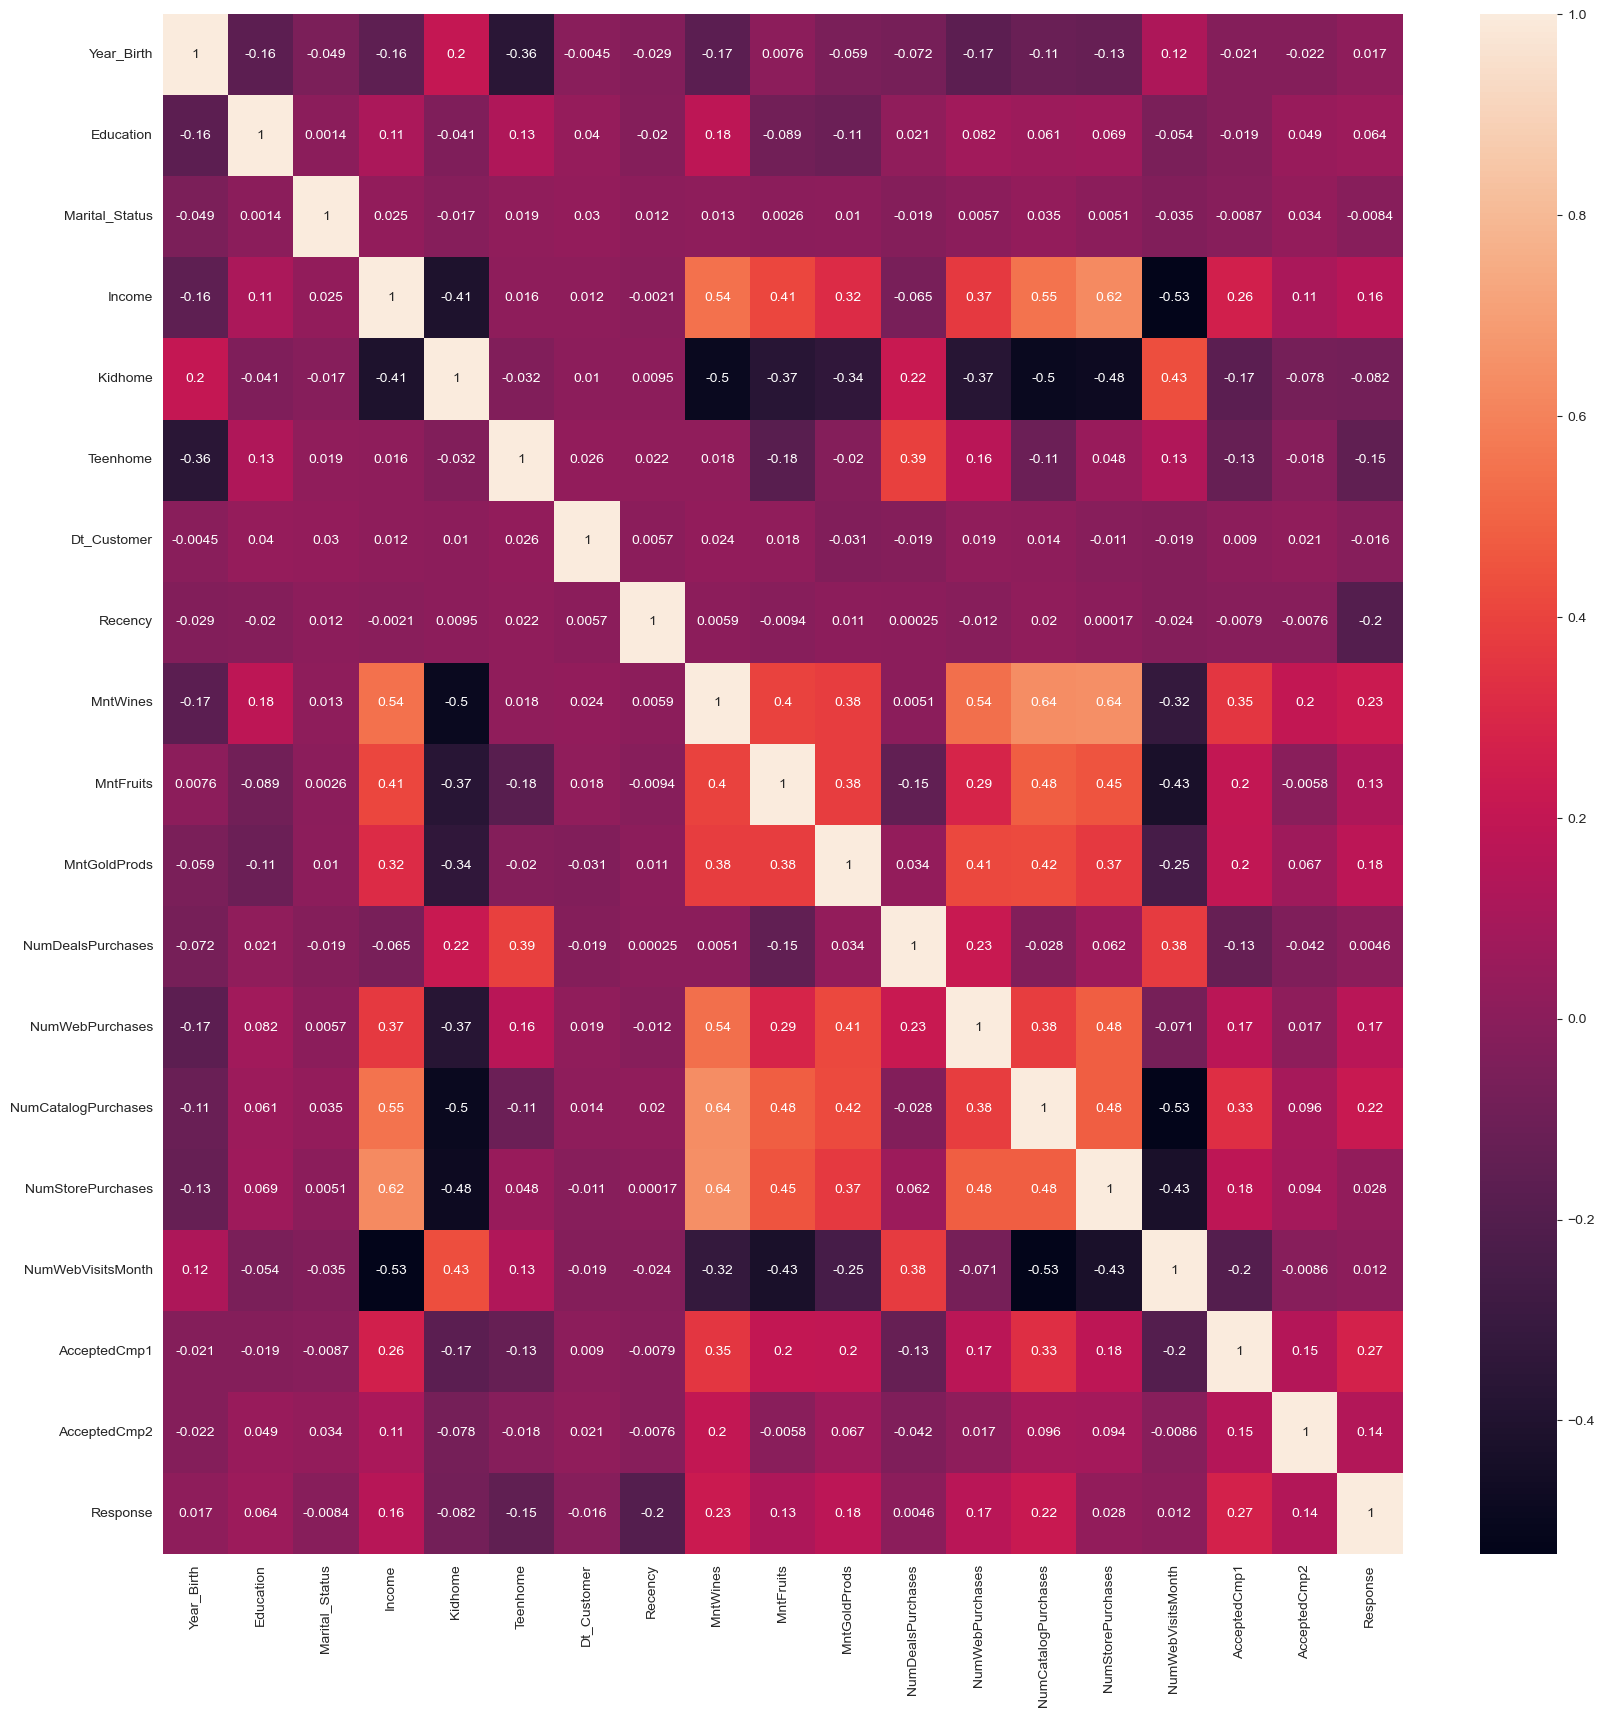

In [381]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(),annot=True)

In [382]:
df.dropna(subset=["Response"],axis=0,inplace=True)

In [383]:
df.Response.unique()

array([1., 0.])

In [384]:
def not_important(df:pd.DataFrame,target:str,thresh=0.2):
    not_important_attributes = list(df.columns)
    not_important_attributes.remove(target) 
    
    for i in df.columns:
        for j in df.columns:
            if i == j: 
                continue 
            if df[i].corr(df[j]) > thresh or df[i].corr(df[j]) < -thresh:
                if i in not_important_attributes:
                    not_important_attributes.remove(i)
                break
    
    return not_important_attributes           

In [385]:
not_important_attrs = not_important(df,"Response")
not_important_attrs

['Education', 'Marital_Status', 'Dt_Customer', 'Recency']

In [386]:
df.drop(columns=not_important_attrs,axis=1,inplace=True)

<Axes: >

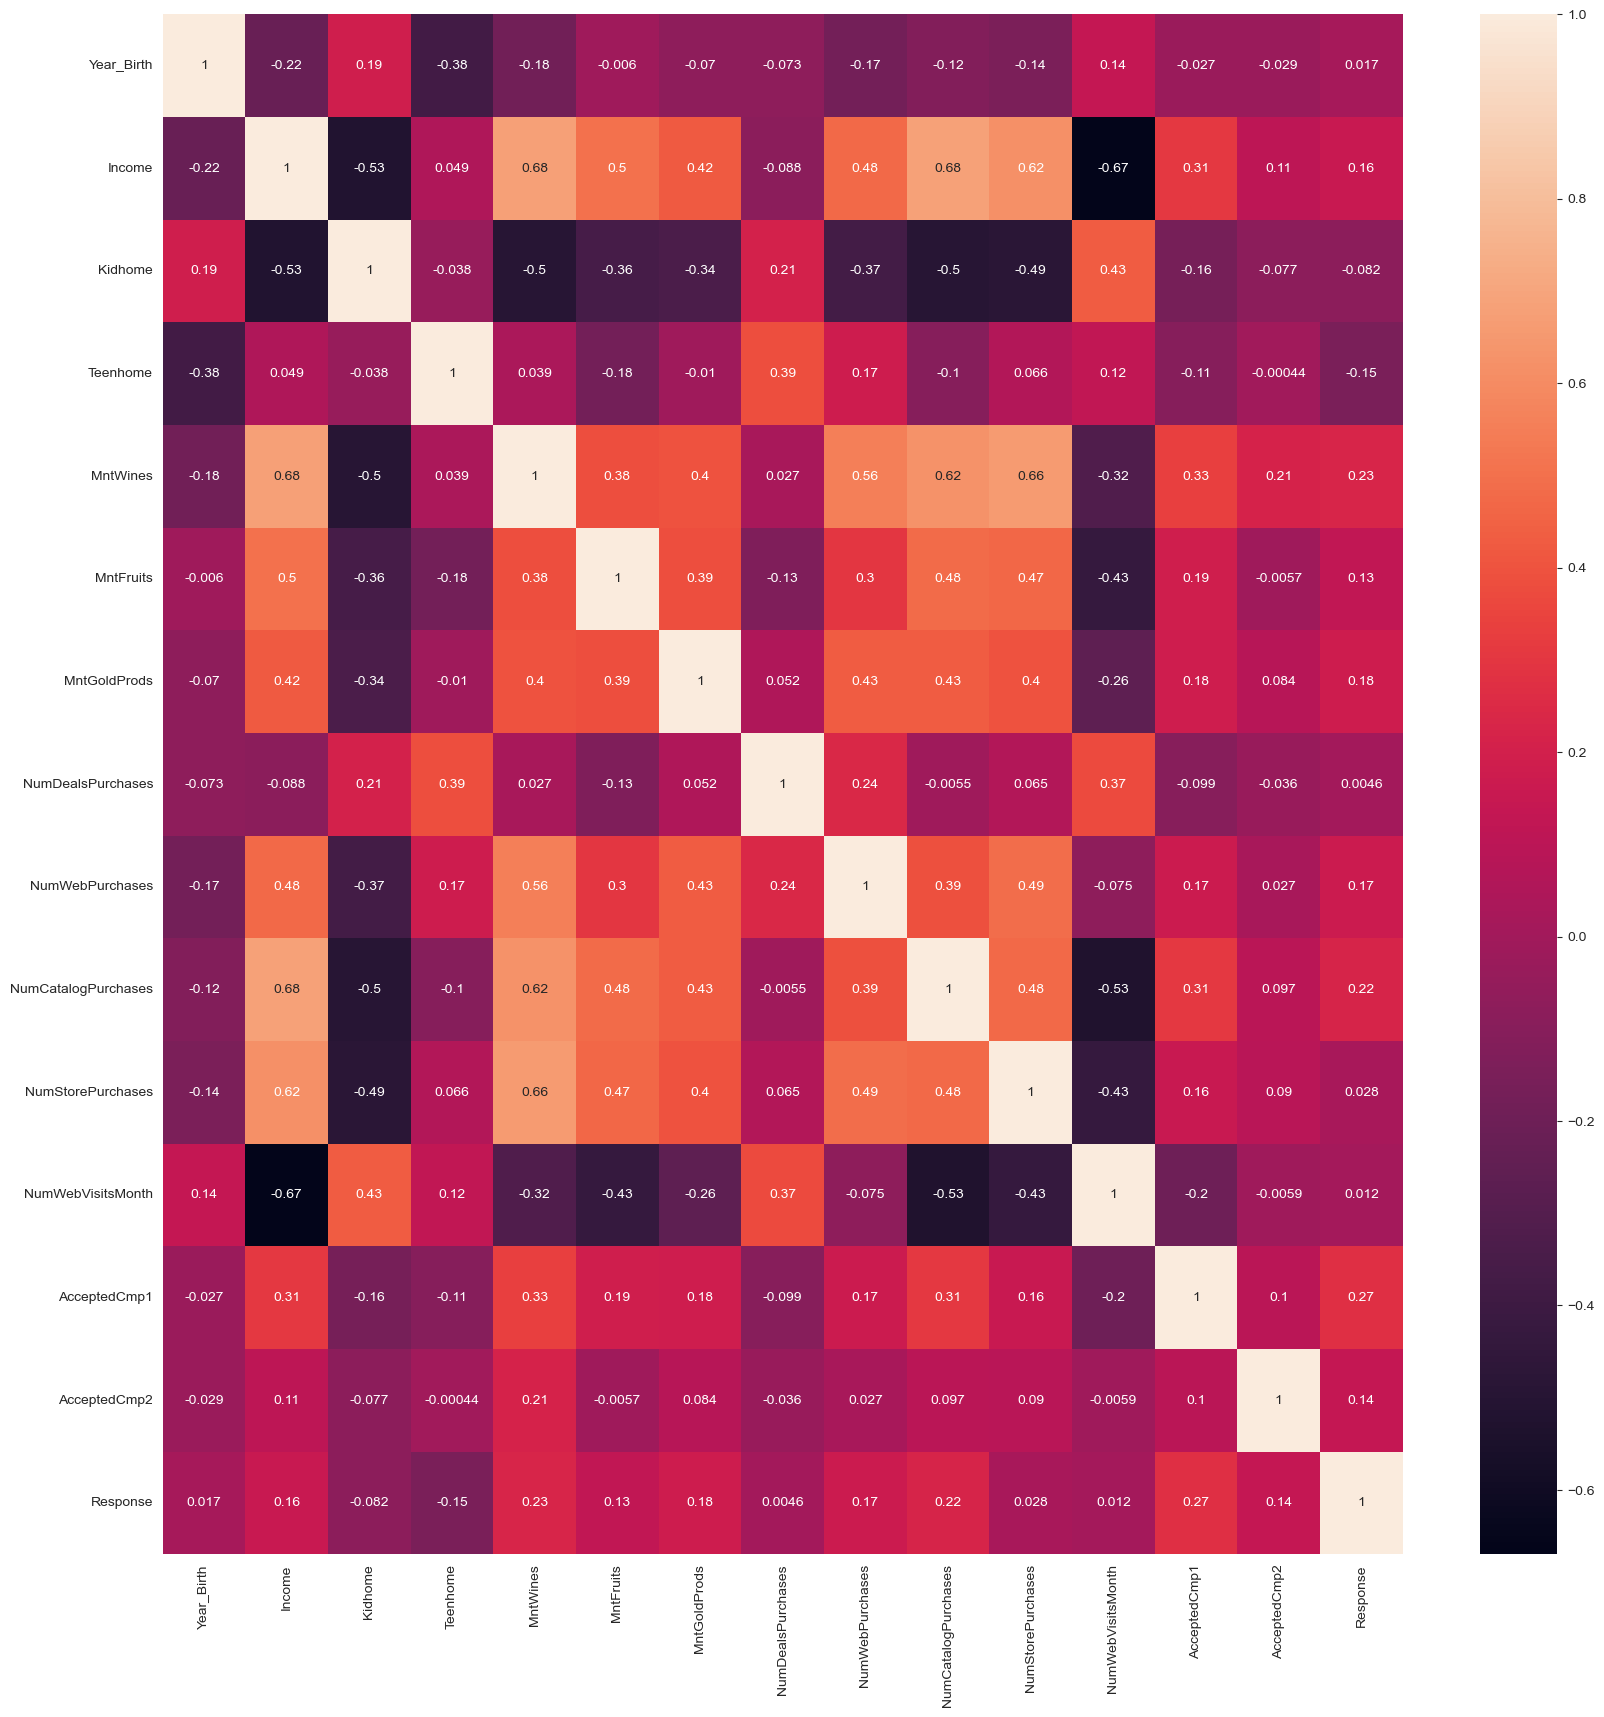

In [387]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(),annot=True)

In [388]:
df.isnull().sum()

Year_Birth             266
Income                 334
Kidhome                274
Teenhome               249
MntWines               289
MntFruits              269
MntGoldProds           269
NumDealsPurchases      264
NumWebPurchases        276
NumCatalogPurchases    294
NumStorePurchases      276
NumWebVisitsMonth      270
AcceptedCmp1           257
AcceptedCmp2           266
Response                 0
dtype: int64

In [389]:
df.sample(5)

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
577,1970.0,13260.0,1.0,NaN,9.0,4.0,7.0,4.0,3.0,0.0,3.0,8.0,0.0,0.0,0.0
128,1961.0,NaN,0.0,1.0,352.0,0.0,15.0,3.0,NaN,1.0,7.0,6.0,0.0,0.0,0.0
910,1966.0,78420.0,0.0,0.0,604.0,28.0,28.0,1.0,3.0,10.0,8.0,1.0,0.0,0.0,0.0
920,1955.0,46015.0,1.0,1.0,38.0,0.0,NaN,1.0,1.0,NaN,NaN,7.0,0.0,1.0,0.0
2173,1951.0,71965.0,0.0,1.0,572.0,NaN,248.0,3.0,6.0,NaN,NaN,NaN,0.0,0.0,0.0


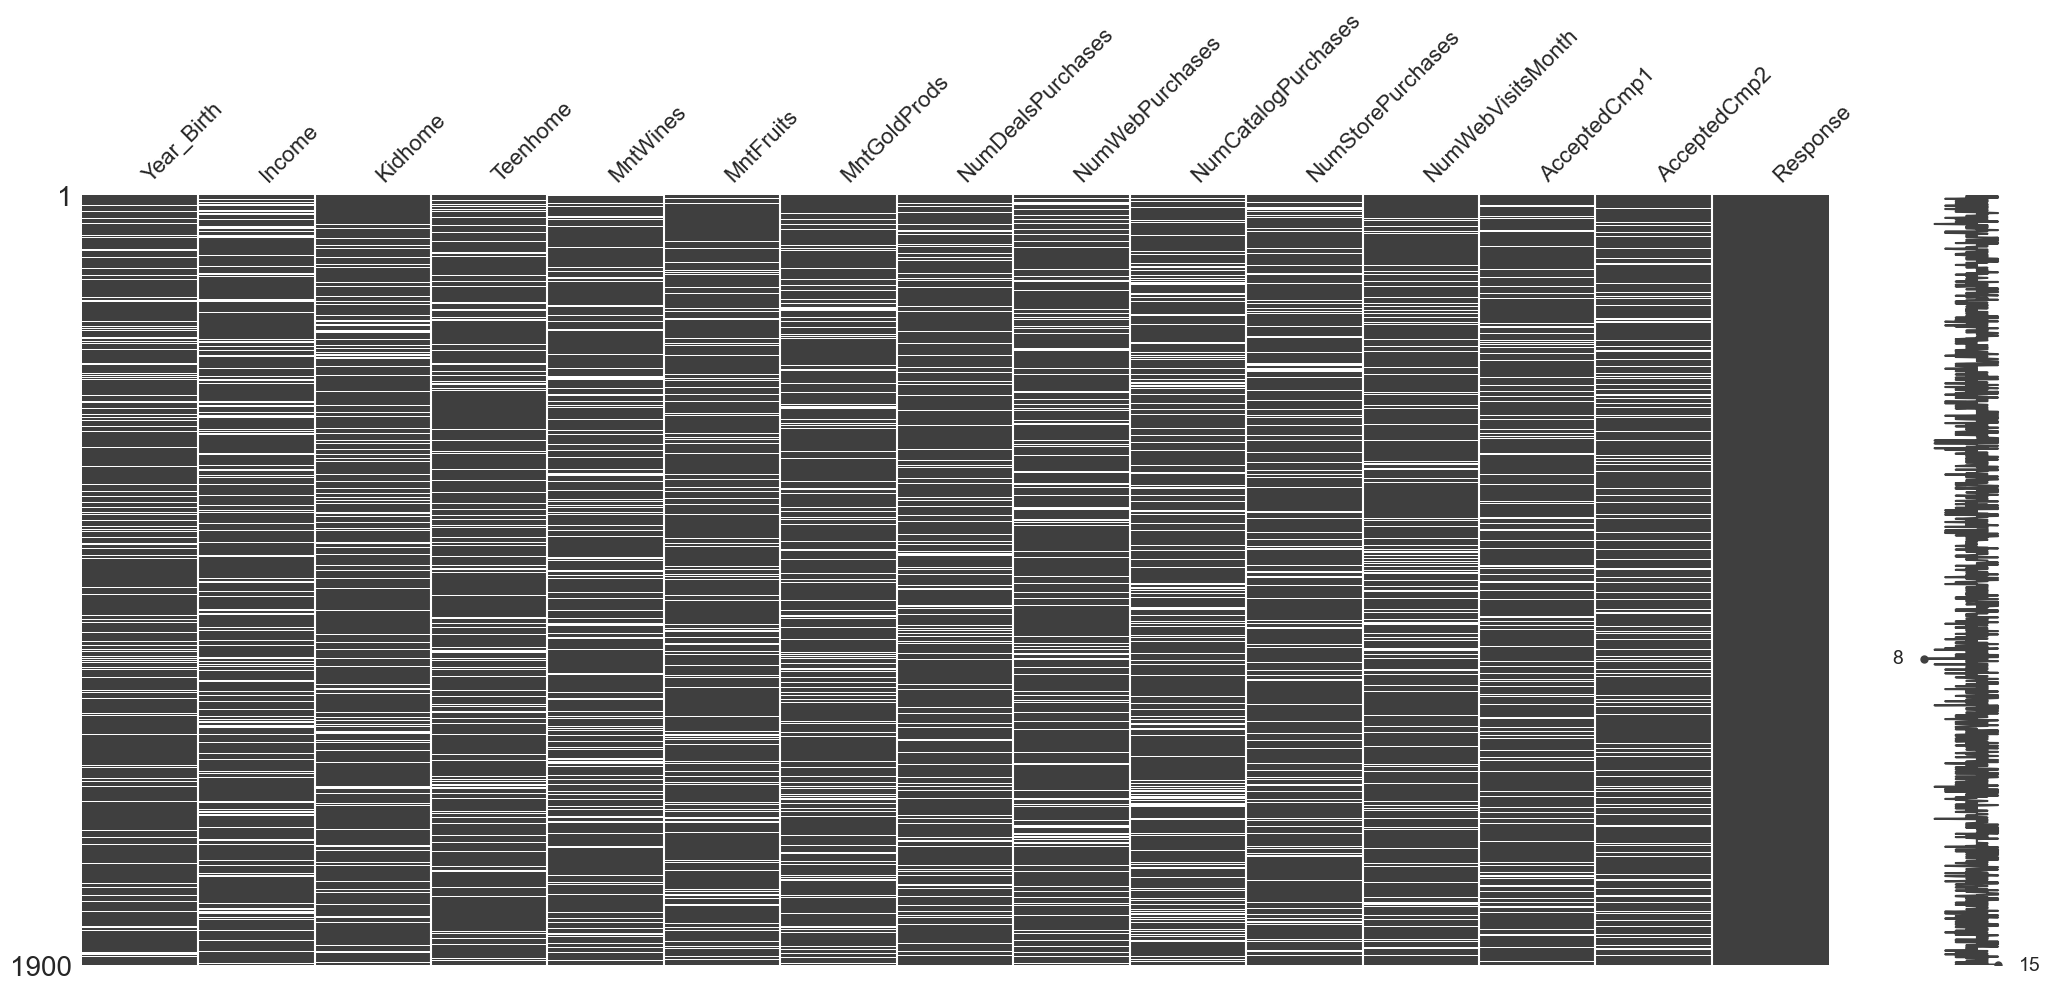

In [390]:
import missingno as msno
msno.matrix(df)
plt.show()


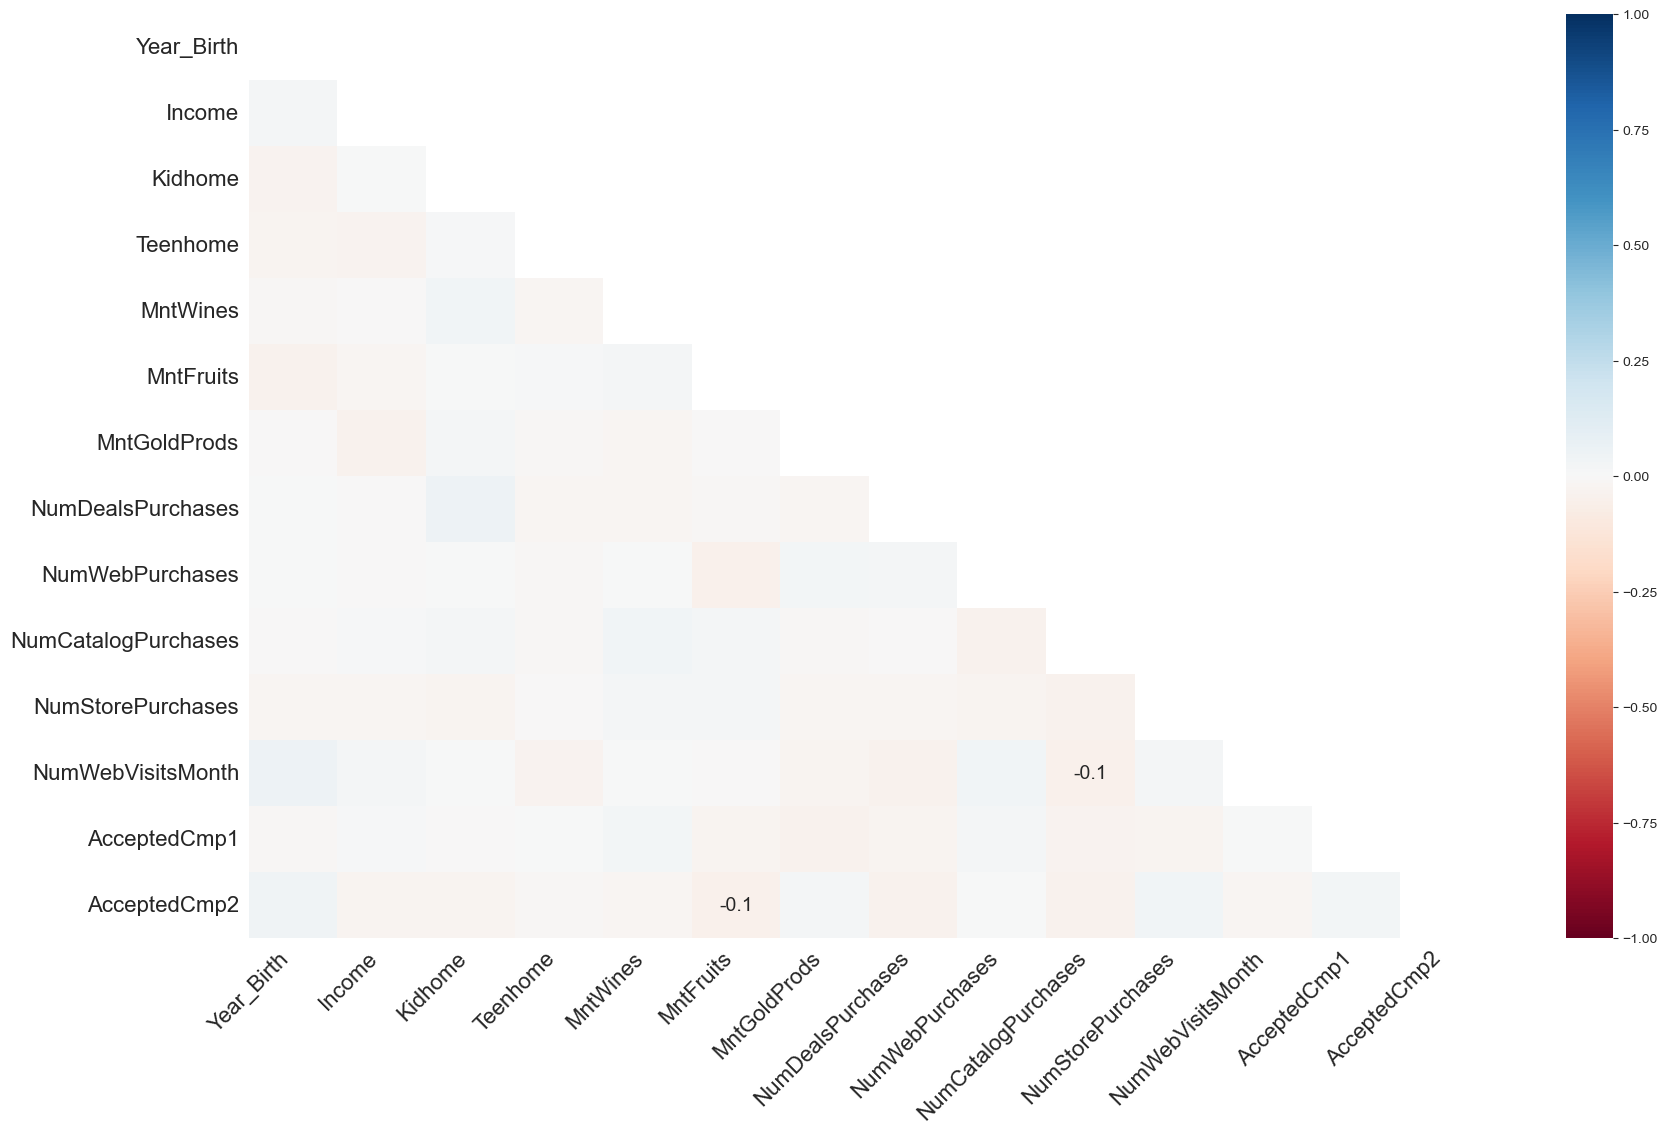

In [391]:
msno.heatmap(df)
plt.show()

array([[<Axes: title={'center': 'Year_Birth'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Kidhome'}>,
        <Axes: title={'center': 'Teenhome'}>],
       [<Axes: title={'center': 'MntWines'}>,
        <Axes: title={'center': 'MntFruits'}>,
        <Axes: title={'center': 'MntGoldProds'}>,
        <Axes: title={'center': 'NumDealsPurchases'}>],
       [<Axes: title={'center': 'NumWebPurchases'}>,
        <Axes: title={'center': 'NumCatalogPurchases'}>,
        <Axes: title={'center': 'NumStorePurchases'}>,
        <Axes: title={'center': 'NumWebVisitsMonth'}>],
       [<Axes: title={'center': 'AcceptedCmp1'}>,
        <Axes: title={'center': 'AcceptedCmp2'}>,
        <Axes: title={'center': 'Response'}>, <Axes: >]], dtype=object)

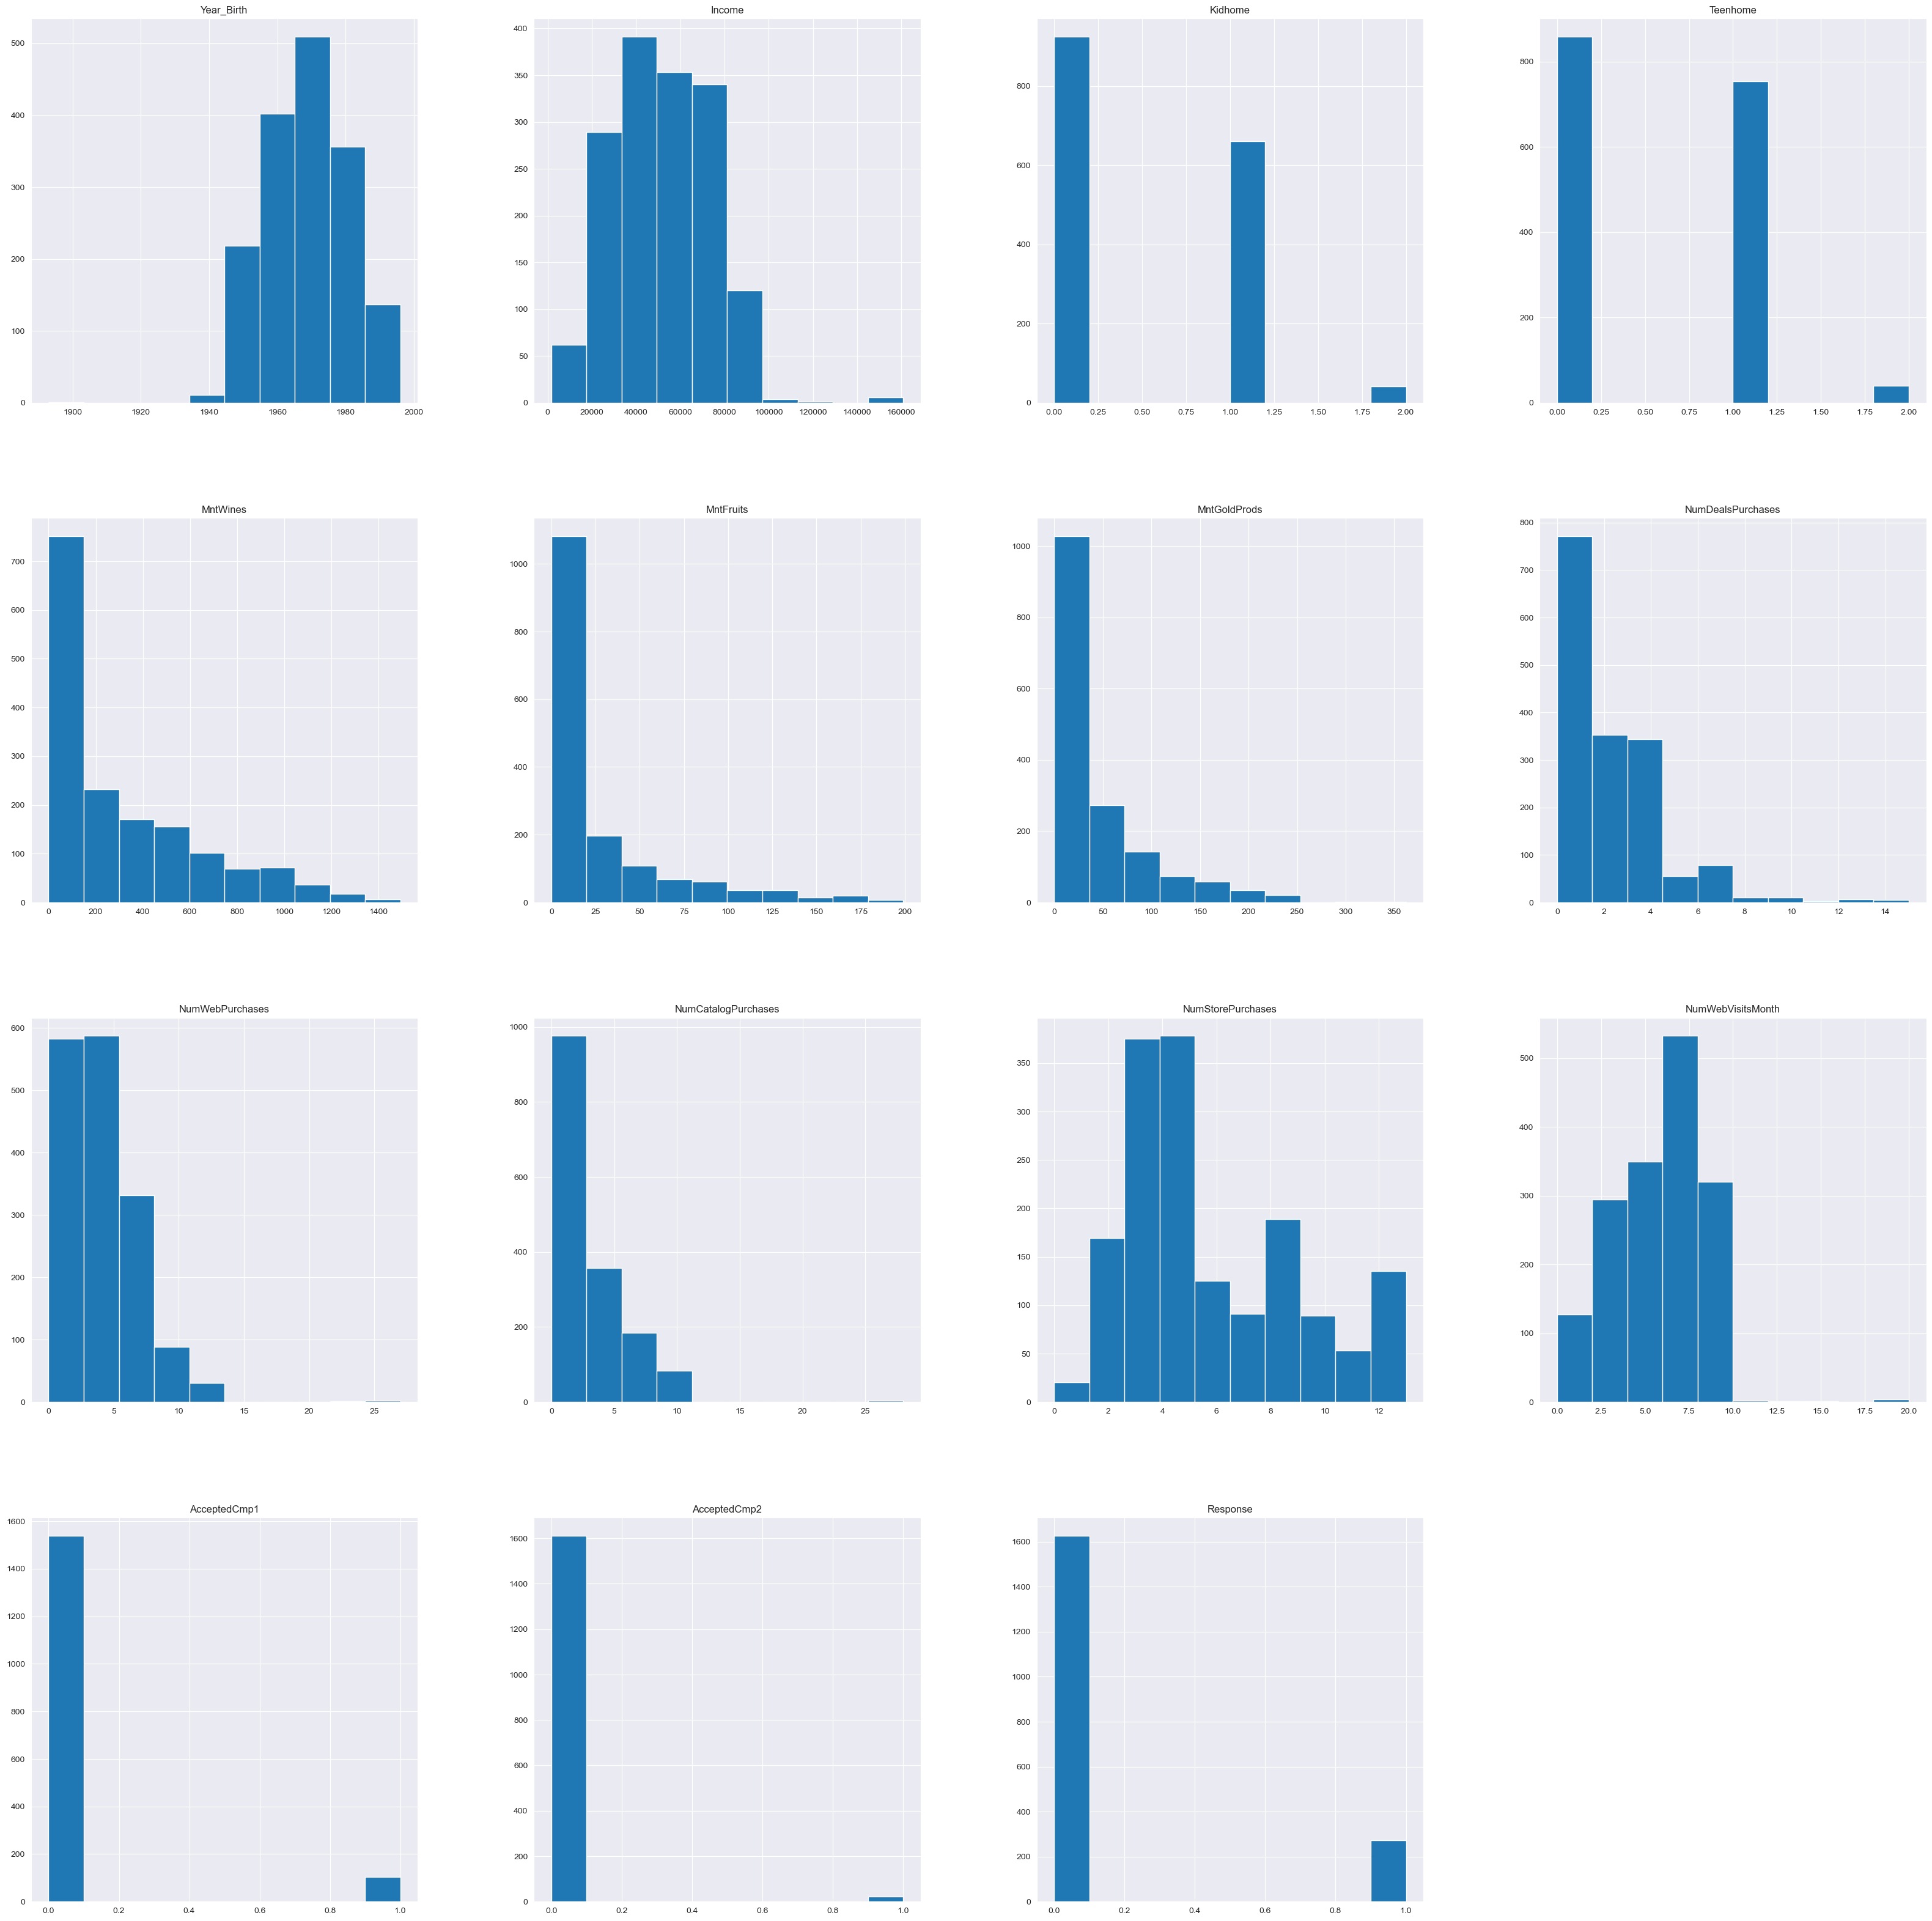

In [392]:
df.hist(figsize=(40,40))


In [393]:
df.sample(5)

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
2238,1956.0,69245.0,0.0,1.0,428.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0
1063,1973.0,35860.0,1.0,1.0,15.0,0.0,20.0,2.0,NaN,1.0,2.0,5.0,0.0,0.0,0.0
1906,1971.0,60491.0,0.0,1.0,637.0,47.0,76.0,4.0,6.0,11.0,7.0,5.0,0.0,0.0,0.0
426,NaN,NaN,0.0,0.0,551.0,137.0,33.0,1.0,6.0,7.0,13.0,1.0,1.0,0.0,0.0
1987,NaN,51373.0,0.0,0.0,83.0,2.0,117.0,1.0,3.0,5.0,3.0,NaN,0.0,NaN,0.0


In [394]:
from sklearn.impute import SimpleImputer
def simple_impute(data:pd.DataFrame,columns:list,strategy):
    data_cpy = data.copy()
    imputer = SimpleImputer(strategy=strategy)
    for col in columns:
        data_cpy[col] = imputer.fit_transform(data_cpy[col].values.reshape(-1,1))
    return data_cpy
    

In [395]:
df.Year_Birth.isnull().sum()
df = simple_impute(df,["Year_Birth","Income"],"median")


In [396]:
df.isnull().sum()

Year_Birth               0
Income                   0
Kidhome                274
Teenhome               249
MntWines               289
MntFruits              269
MntGoldProds           269
NumDealsPurchases      264
NumWebPurchases        276
NumCatalogPurchases    294
NumStorePurchases      276
NumWebVisitsMonth      270
AcceptedCmp1           257
AcceptedCmp2           266
Response                 0
dtype: int64

In [397]:
categorical_attributes = [col for col in df.columns if len(df[col].unique())<10]
numerical_attributes = [col for col in df.columns if len(df[col].unique())>10]

In [398]:
categorical_attributes

['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']

In [399]:
numerical_attributes

['Year_Birth',
 'Income',
 'MntWines',
 'MntFruits',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

<Axes: >

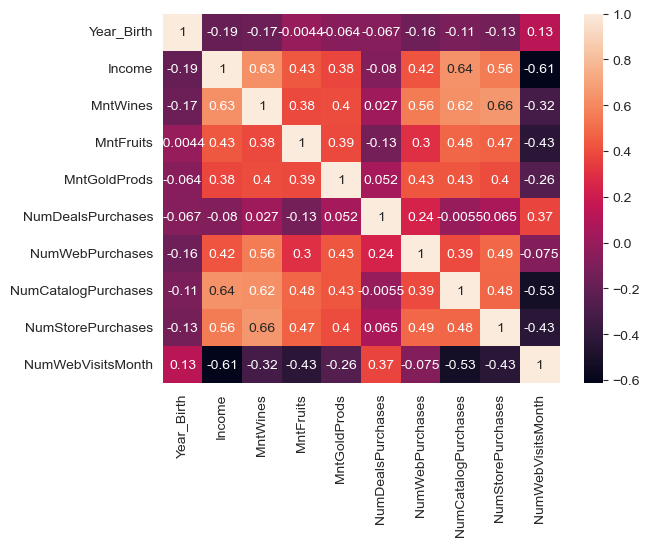

In [400]:

sns.heatmap(df[numerical_attributes].corr(),annot=True)

In [401]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[numerical_attributes])
knn_imputer = KNNImputer(n_neighbors=6)
imputed_data = knn_imputer.fit_transform(scaled_data)
imputed_data = scaler.inverse_transform(imputed_data)
df[numerical_attributes] = imputed_data

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1900 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           1900 non-null   float64
 1   Income               1900 non-null   float64
 2   Kidhome              1626 non-null   float64
 3   Teenhome             1651 non-null   float64
 4   MntWines             1900 non-null   float64
 5   MntFruits            1900 non-null   float64
 6   MntGoldProds         1900 non-null   float64
 7   NumDealsPurchases    1900 non-null   float64
 8   NumWebPurchases      1900 non-null   float64
 9   NumCatalogPurchases  1900 non-null   float64
 10  NumStorePurchases    1900 non-null   float64
 11  NumWebVisitsMonth    1900 non-null   float64
 12  AcceptedCmp1         1643 non-null   float64
 13  AcceptedCmp2         1634 non-null   float64
 14  Response             1900 non-null   float64
dtypes: float64(15)
memory usage: 237.5 KB


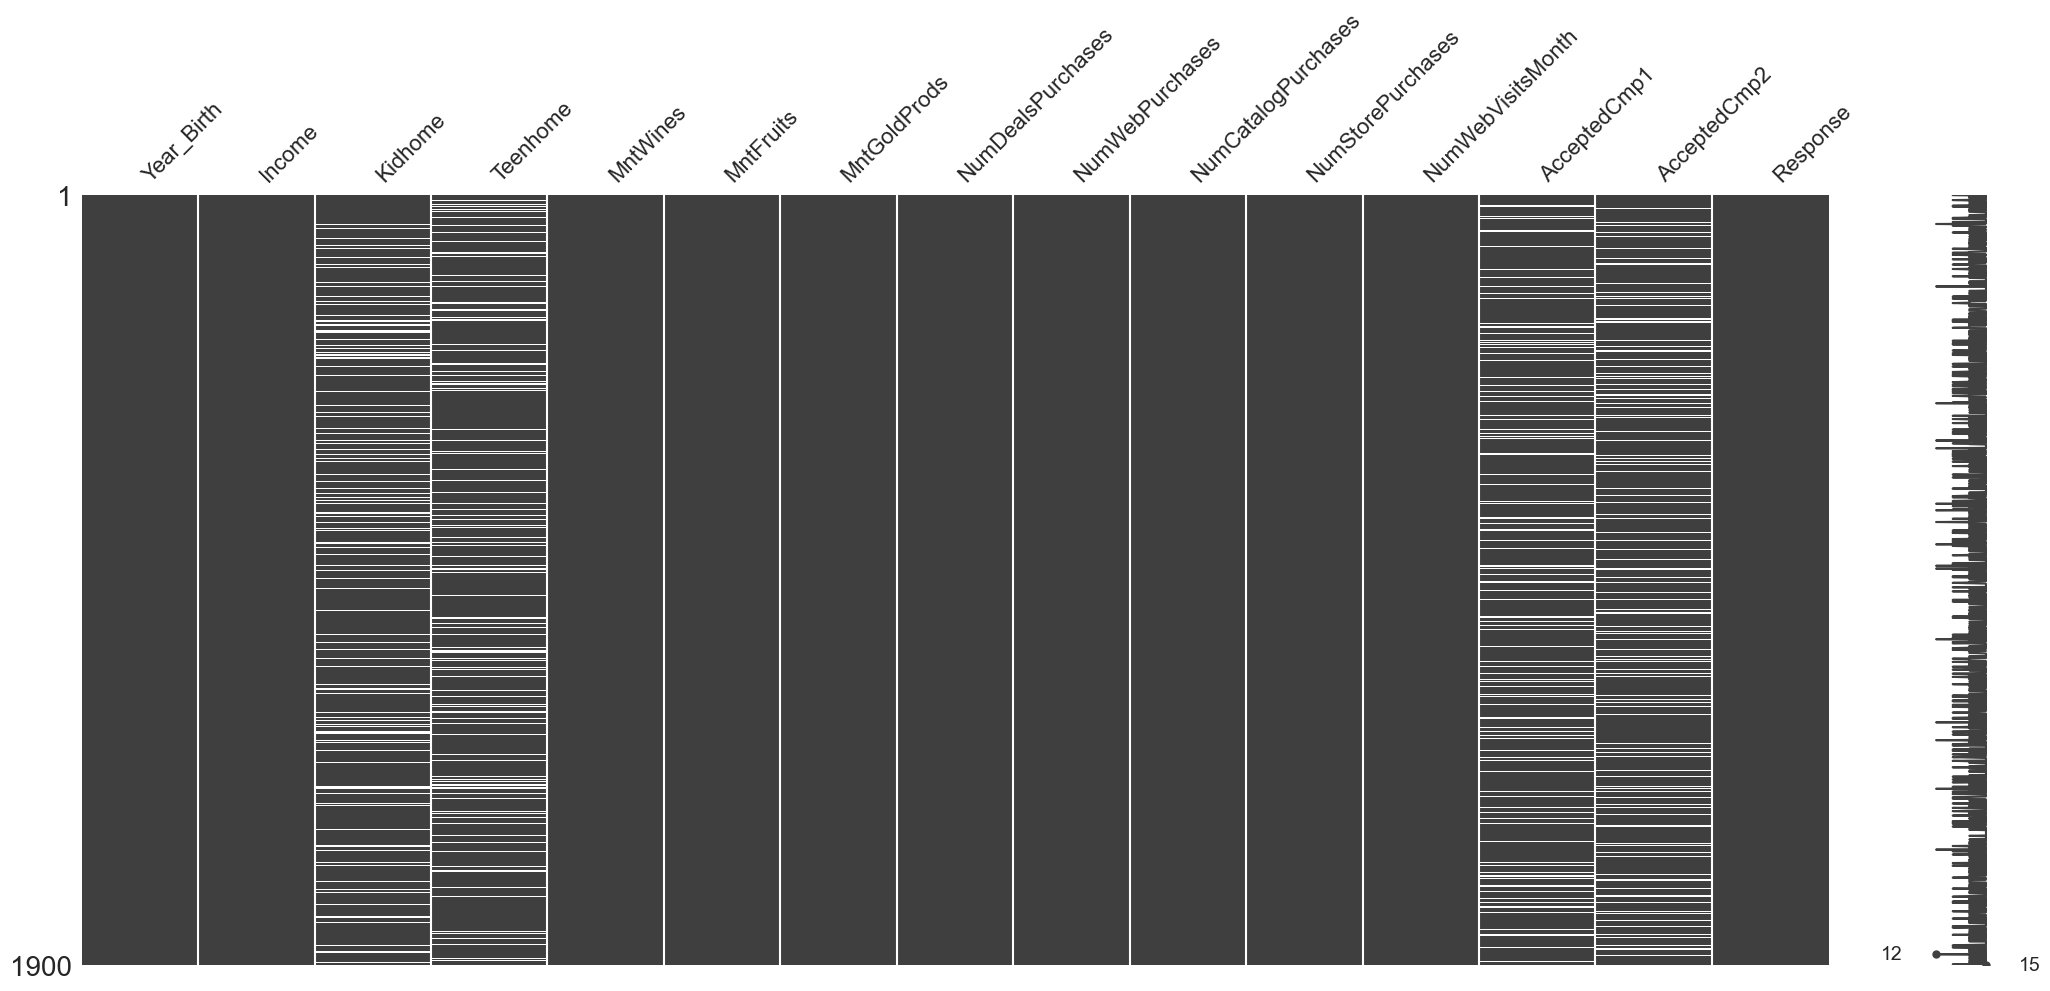

In [403]:

msno.matrix(df)
plt.show()

array([[<Axes: title={'center': 'Kidhome'}>,
        <Axes: title={'center': 'Teenhome'}>],
       [<Axes: title={'center': 'AcceptedCmp1'}>,
        <Axes: title={'center': 'AcceptedCmp2'}>],
       [<Axes: title={'center': 'Response'}>, <Axes: >]], dtype=object)

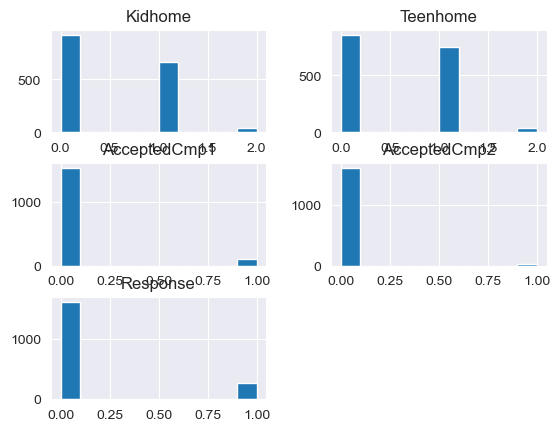

In [404]:
df[categorical_attributes].hist()

In [405]:
df[categorical_attributes].isnull().sum()

Kidhome         274
Teenhome        249
AcceptedCmp1    257
AcceptedCmp2    266
Response          0
dtype: int64

In [406]:
frequent_imputer = SimpleImputer(strategy = 'most_frequent')
df["AcceptedCmp2"] = frequent_imputer.fit_transform(df["AcceptedCmp2"].values.reshape(-1,1))

In [407]:
df[categorical_attributes].isnull().sum()

Kidhome         274
Teenhome        249
AcceptedCmp1    257
AcceptedCmp2      0
Response          0
dtype: int64

<Axes: >

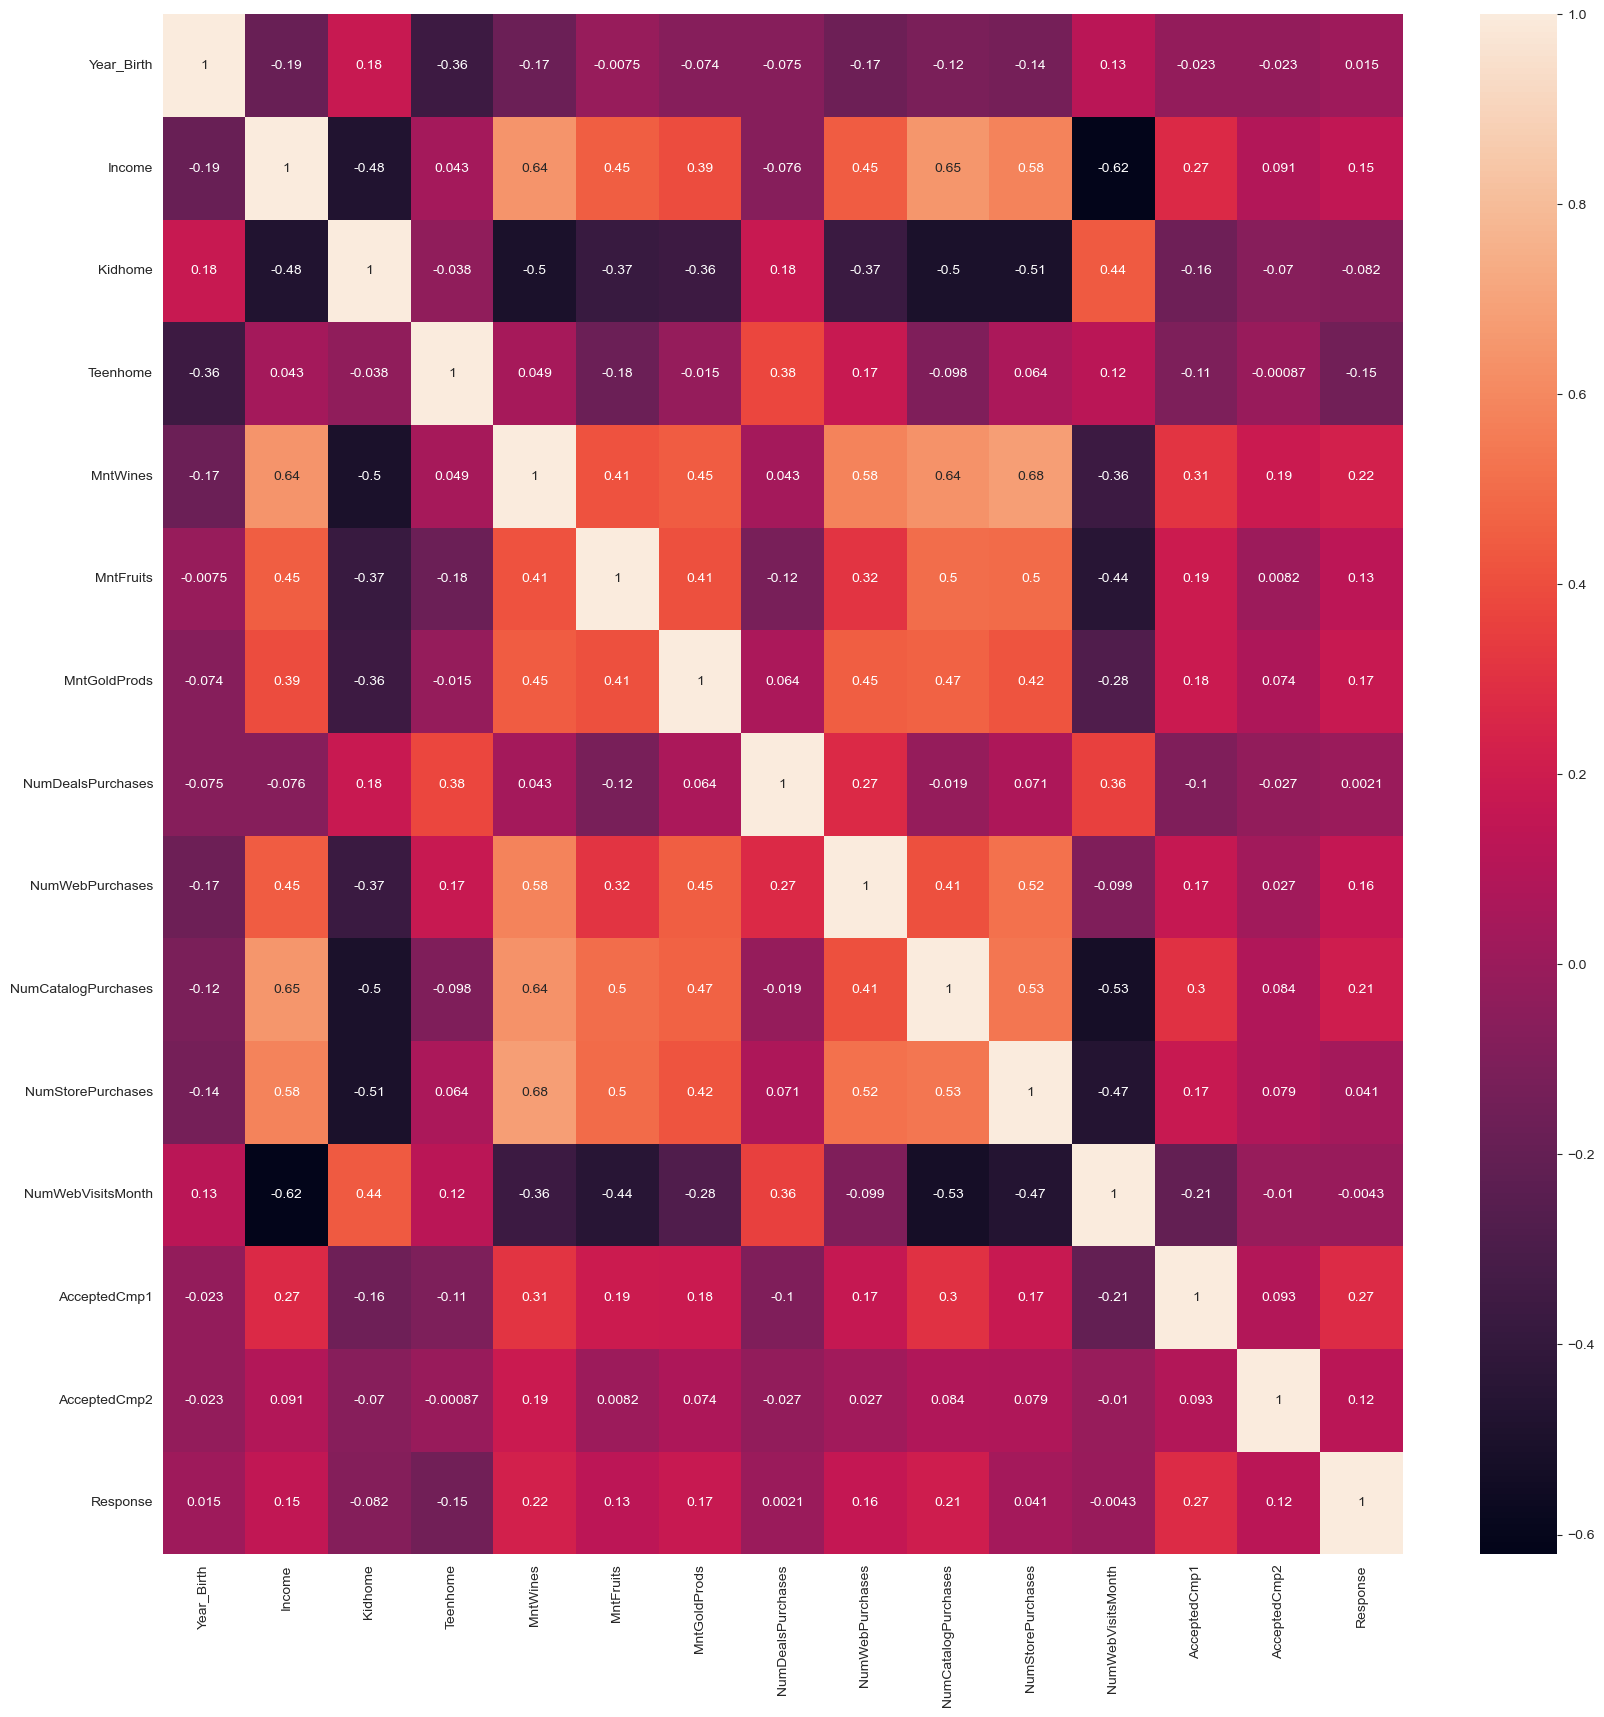

In [408]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(),annot=True)

In [409]:
null_categorical_atts = [att for att in categorical_attributes if df[att].isnull().sum()>0]
null_categorical_atts

['Kidhome', 'Teenhome', 'AcceptedCmp1']

In [410]:
list1=[i for i in null_categorical_atts]
for i in null_categorical_atts:
    for j in df.columns:
        if i==j: continue
        if df[i].corr(df[j])>0.4 or df[i].corr(df[j])<-0.4:
            if not list1.__contains__(i):
                list1.append(i)
            if not list1.__contains__(j):
                list1.append(j)

list1

['Kidhome',
 'Teenhome',
 'AcceptedCmp1',
 'Income',
 'MntWines',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

In [411]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[list1])
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)
imputed_data = scaler.inverse_transform(imputed_data)

df[list1] = imputed_data

In [412]:
df[categorical_attributes].isnull().sum()

Kidhome         0
Teenhome        0
AcceptedCmp1    0
AcceptedCmp2    0
Response        0
dtype: int64

In [413]:
df.isnull().sum()

Year_Birth             0
Income                 0
Kidhome                0
Teenhome               0
MntWines               0
MntFruits              0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
dtype: int64

In [415]:
df.sample(5)

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
972,1988.0,15716.0,1.0,0.0,16.000000,10.0,26.000000,3.0,3.0,0.0,4.0,8.0,0.0,0.0,0.0
1,1954.0,46344.0,1.0,1.0,20.833333,1.0,6.000000,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0
178,1959.0,38285.0,2.0,1.0,2.000000,0.0,1.000000,1.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0
1059,1987.0,67605.0,0.0,0.0,336.000000,28.0,97.666667,1.0,2.0,6.5,6.0,1.0,0.0,0.0,0.0
732,1978.0,66373.0,1.0,1.0,328.000000,9.0,109.000000,7.0,4.0,2.0,7.5,3.0,0.0,0.0,0.0


In [416]:
df

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
0,1957.0,58138.0,0.0,1.0,635.000000,88.0,88.000000,3.000000,8.000000,10.0,4.0,7.000000,0.0,0.0,1.0
1,1954.0,46344.0,1.0,1.0,20.833333,1.0,6.000000,2.000000,1.000000,1.0,2.0,5.000000,0.0,0.0,0.0
2,1965.0,71613.0,0.0,0.0,608.000000,49.0,42.000000,1.833333,8.000000,2.0,10.0,4.000000,0.0,0.0,0.0
3,1984.0,26646.0,1.0,0.0,11.000000,4.0,5.000000,2.000000,2.000000,0.0,4.0,6.000000,0.0,0.0,0.0
4,1970.0,58293.0,1.0,0.0,173.000000,43.0,15.000000,5.000000,5.000000,3.0,6.0,5.000000,0.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,1974.0,34421.0,0.8,0.0,9.166667,3.0,9.000000,1.000000,1.000000,0.0,2.0,7.000000,0.0,0.0,0.0
2236,1946.0,51025.5,2.0,1.0,406.000000,0.0,56.666667,7.000000,6.333333,2.0,5.0,7.000000,1.0,0.0,0.0
2237,1981.0,51025.5,0.0,0.6,908.000000,48.0,24.000000,1.000000,2.000000,3.0,13.0,4.333333,0.0,0.0,0.0
2238,1956.0,69245.0,0.0,1.0,428.000000,30.0,61.000000,2.000000,6.000000,5.0,10.0,3.000000,0.0,0.0,0.0


In [417]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [418]:
param_grid ={
    'criterion':["gini", "entropy", "log_loss"],
    'max_depth': [10,15,20,25],
    'min_samples_split': [4,8,12]
}

In [419]:
X = df.iloc[:,:-1]
Y = df["Response"]

In [421]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [422]:
from sklearn.model_selection import KFold, RepeatedKFold
#podatochnoto m-vo: (1,2,3,4,5) 4-train 1-test x5 vo plus 1 iteracii
rkf = RepeatedKFold(n_splits=5)


In [425]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(estimator=model,param_grid=param_grid,cv=rkf,n_jobs=-1)

In [426]:
cv.fit(X_train,Y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 15, 20, 25],
                         'min_samples_split': [4, 8, 12]})

In [428]:
model = cv.best_estimator_
y_pred = model.predict(X_test)

In [429]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,y_pred)

0.85

In [431]:
from sklearn.metrics import f1_score,classification_report

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92       324
         1.0       0.48      0.29      0.36        56

    accuracy                           0.85       380
   macro avg       0.68      0.62      0.64       380
weighted avg       0.83      0.85      0.83       380

